In [1]:
# R code for Module  on indicator variables -
# except for the last section on the AirBbB example

if (!require(ggplot2)) install.packages("ggplot2")
library(ggplot2) 
if (!require(tidyverse)) install.packages("tidyverse")
library(tidyverse) 


Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: tidyverse
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.1       ✔ purrr   0.3.2  
✔ tidyr   0.8.3       ✔ dplyr   0.8.0.1
✔ readr   1.3.1       ✔ stringr 1.4.0  
✔ tibble  2.1.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# edsal is a dataframe to store the contents of the EDAL.csv file
 
edsal <- read_csv("EDSAL.csv", col_types = list(
  Education = col_factor(c("HS", "UG", "GRAD")),
  Experience = col_integer(),
  Salary = col_double()))

In [3]:
str(edsal)  # what happened to the first row of the csv file? 
head(edsal,10)


Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	300 obs. of  3 variables:
 $ Education : Factor w/ 3 levels "HS","UG","GRAD": 1 1 1 1 1 1 1 1 1 1 ...
 $ Experience: int  2 14 36 16 36 33 36 8 3 21 ...
 $ Salary    : num  34.4 59.2 113.3 69.1 106 ...
 - attr(*, "spec")=
  .. cols(
  ..   Education = col_factor(levels = c("HS", "UG", "GRAD"), ordered = FALSE, include_na = FALSE),
  ..   Experience = col_integer(),
  ..   Salary = col_double()
  .. )


Education,Experience,Salary
HS,2,34.43222
HS,14,59.15737
HS,36,113.27017
HS,16,69.14739
HS,36,106.01556
HS,33,58.63413
HS,36,101.08130
HS,8,51.32871
HS,3,58.19683
HS,21,77.96433


In [4]:
# Using the mutate function, to create new variables
# I've creating two new indicator variables called Graduate and HS which are determined by the value of Education
# note the use of the pipe operator %>% to add these two new variables to edsal 

edsal<- edsal %>%
  mutate(Graduate = ifelse(Education=="GRAD",1,0)) %>%
  mutate(HS = ifelse(Education=="HS",1,0))

head(edsal,10)


Education,Experience,Salary,Graduate,HS
HS,2,34.43222,0,1
HS,14,59.15737,0,1
HS,36,113.27017,0,1
HS,16,69.14739,0,1
HS,36,106.01556,0,1
HS,33,58.63413,0,1
HS,36,101.08130,0,1
HS,8,51.32871,0,1
HS,3,58.19683,0,1
HS,21,77.96433,0,1


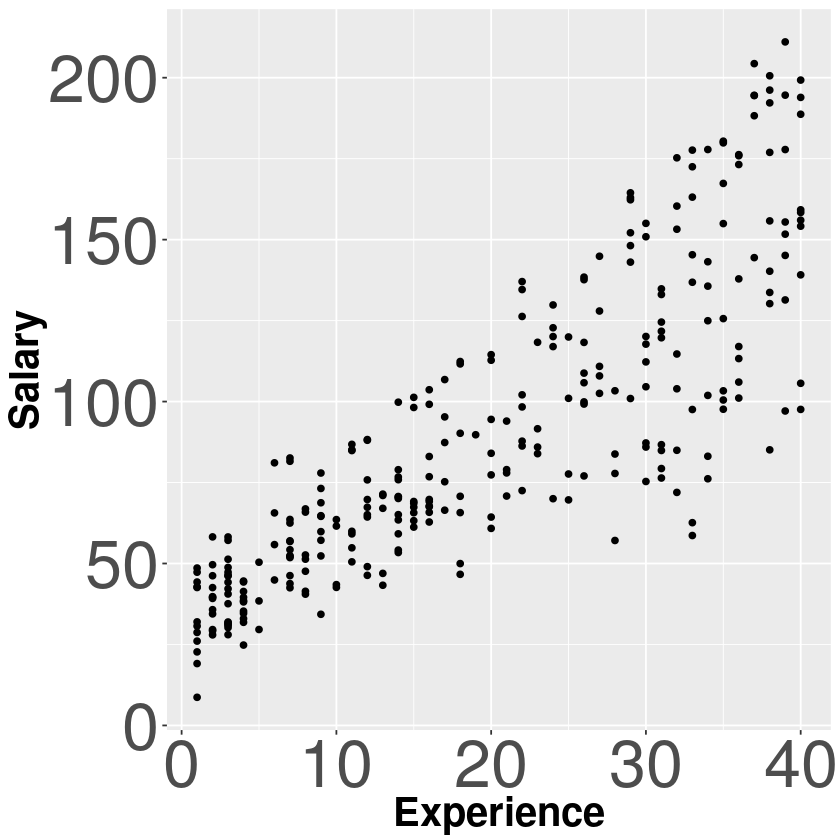

In [5]:
ggplot(edsal, aes(x=Experience, y=Salary)) + geom_point() +
  scale_colour_hue(l=50) + 
  theme(axis.text.x = element_text(size=40), axis.text.y = element_text(size=40), 
   axis.title=element_text(size=24,face="bold"))
  

In [6]:
RS.lm <- lm(Salary ~ Experience, data=edsal)
summary(RS.lm)



Call:
lm(formula = Salary ~ Experience, data = edsal)

Residuals:
   Min     1Q Median     3Q    Max 
-73.00 -12.82  -1.18  13.32  60.85 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  29.4679     2.5673   11.48   <2e-16 ***
Experience    3.0959     0.1113   27.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.05 on 298 degrees of freedom
Multiple R-squared:  0.7218,	Adjusted R-squared:  0.7209 
F-statistic: 773.2 on 1 and 298 DF,  p-value: < 2.2e-16


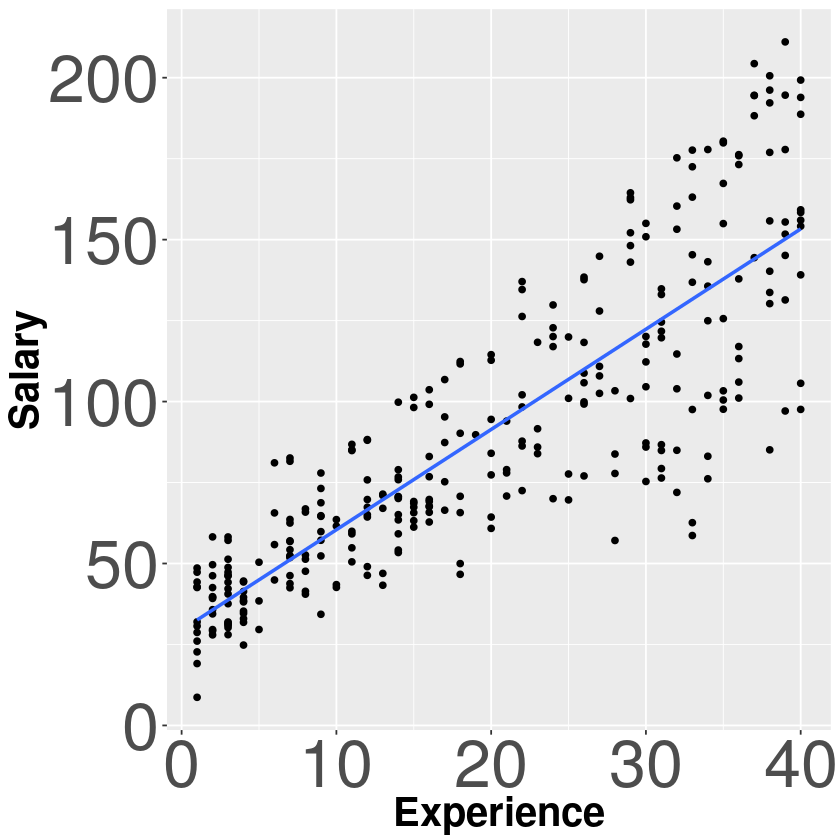

In [7]:
ggplot(edsal, aes(x=Experience, y=Salary)) + geom_point() +
  scale_colour_hue(l=50) + 
  geom_smooth(method=lm,   # Add linear regression lines
              se=FALSE,    # Don't add shaded confidence region
              fullrange=TRUE) +
  theme(axis.text.x = element_text(size=40), axis.text.y = element_text(size=40), 
        axis.title=element_text(size=24,face="bold"))



In [8]:
DR1.lm <- lm(Salary ~ HS + Graduate, data=edsal)
summary(DR1.lm)



Call:
lm(formula = Salary ~ HS + Graduate, data = edsal)

Residuals:
     Min       1Q   Median       3Q      Max 
-106.764  -26.211   -2.305   31.684   95.616 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   87.923      4.062  21.645  < 2e-16 ***
HS           -22.487      5.759  -3.905 0.000117 ***
Graduate      27.518      5.774   4.766 2.94e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 40.82 on 297 degrees of freedom
Multiple R-squared:  0.2013,	Adjusted R-squared:  0.196 
F-statistic: 37.44 on 2 and 297 DF,  p-value: 3.166e-15


In [9]:
# You can directly use a  Factor Variable in regression in R 
#instead of creating & using Dummy variables
DR1a.lm <- lm(Salary ~ Education, data=edsal) 
summary(DR1a.lm)
contrasts(edsal$Education)



Call:
lm(formula = Salary ~ Education, data = edsal)

Residuals:
     Min       1Q   Median       3Q      Max 
-106.764  -26.211   -2.305   31.684   95.616 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     65.436      4.082  16.029  < 2e-16 ***
EducationUG     22.487      5.759   3.905 0.000117 ***
EducationGRAD   50.006      5.788   8.640 3.54e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 40.82 on 297 degrees of freedom
Multiple R-squared:  0.2013,	Adjusted R-squared:  0.196 
F-statistic: 37.44 on 2 and 297 DF,  p-value: 3.166e-15


,UG,GRAD
HS,0,0
UG,1,0
GRAD,0,1


In [10]:
DR2.lm <- lm(Salary ~ Experience + HS + Graduate, data=edsal)
summary(DR2.lm)



Call:
lm(formula = Salary ~ Experience + HS + Graduate, data = edsal)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.702 -10.057   1.011  11.055  40.910 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.35874    2.34784  12.079  < 2e-16 ***
Experience    2.97087    0.08011  37.084  < 2e-16 ***
HS          -15.06163    2.43603  -6.183 2.08e-09 ***
Graduate     25.92475    2.43432  10.650  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.21 on 296 degrees of freedom
Multiple R-squared:  0.8585,	Adjusted R-squared:  0.8571 
F-statistic: 598.8 on 3 and 296 DF,  p-value: < 2.2e-16


In [11]:
# Using the Categorical Variable directly (i.e., NOT USING DUMMIES)
DR2a.lm <- lm(Salary ~ Experience + Education, data=edsal)
summary(DR2a.lm)



Call:
lm(formula = Salary ~ Experience + Education, data = edsal)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.702 -10.057   1.011  11.055  40.910 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   13.29711    2.22227   5.984 6.29e-09 ***
Experience     2.97087    0.08011  37.084  < 2e-16 ***
EducationUG   15.06163    2.43603   6.183 2.08e-09 ***
EducationGRAD 40.98638    2.45205  16.715  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.21 on 296 degrees of freedom
Multiple R-squared:  0.8585,	Adjusted R-squared:  0.8571 
F-statistic: 598.8 on 3 and 296 DF,  p-value: < 2.2e-16


In [12]:
# adding the INTERACTION VARIABLES to edsal using the mutate function in R
#
edsal<- edsal %>%
  mutate(H_Exp = HS*Experience) %>%
  mutate(G_Exp = Graduate*Experience)



In [13]:

DR3.lm <- lm(Salary ~ Experience + HS + Graduate + H_Exp + G_Exp, data=edsal)
summary(DR3.lm)



Call:
lm(formula = Salary ~ Experience + HS + Graduate + H_Exp + G_Exp, 
    data = edsal)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.241  -7.128   0.733   7.158  34.094 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 27.33477    1.91610  14.266  < 2e-16 ***
Experience   3.02194    0.08087  37.367  < 2e-16 ***
HS          11.47557    2.63966   4.347  1.9e-05 ***
Graduate     0.30444    2.75592   0.110    0.912    
H_Exp       -1.50482    0.11758 -12.798  < 2e-16 ***
G_Exp        1.24323    0.11528  10.784  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.26 on 294 degrees of freedom
Multiple R-squared:  0.9501,	Adjusted R-squared:  0.9492 
F-statistic:  1119 on 5 and 294 DF,  p-value: < 2.2e-16


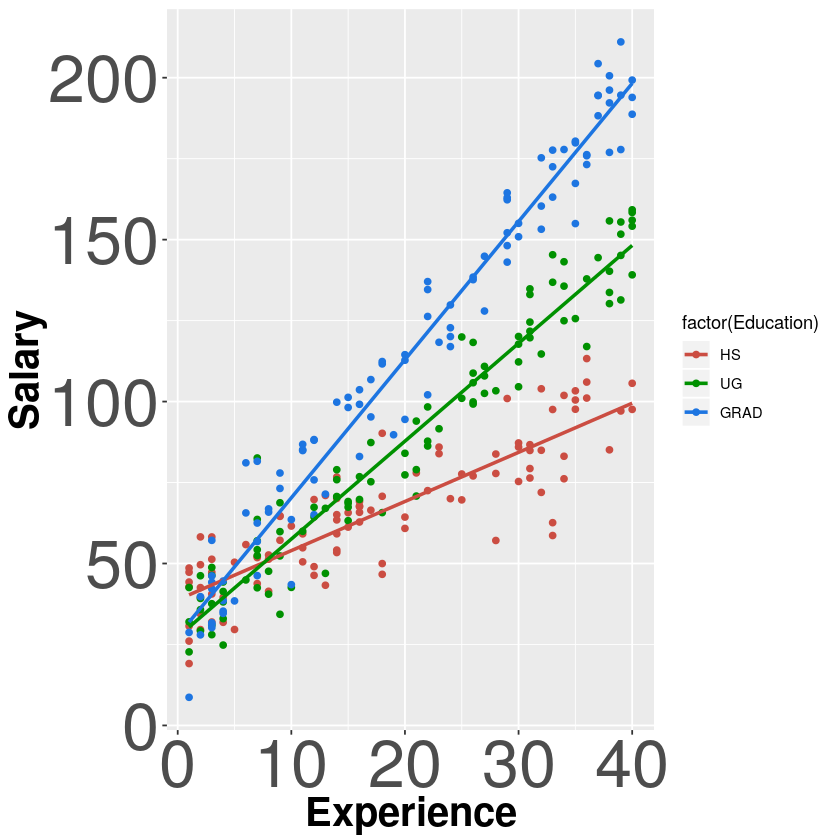

In [14]:
ggplot(edsal, aes(x=Experience, y=Salary, color=factor(Education)))  + geom_point(mapping = aes(color=factor(Education))) +
  scale_colour_hue(l=50) + # Use a slightly darker palette than normal
  geom_smooth(method=lm,   # Add linear regression lines
              se=FALSE,    # Don't add shaded confidence region
              fullrange=TRUE) + # Extend regression lines
  theme(axis.text.x = element_text(size=40), axis.text.y = element_text(size=40), 
         axis.title=element_text(size=24,face="bold"))



In [15]:
# Using Categorical variable directly in the interaction model (i.e., NOT USING DUMMIES)
DR3a.lm <- lm(Salary ~ Education + Education*Experience, data=edsal)
summary(DR3a.lm)


Call:
lm(formula = Salary ~ Education + Education * Experience, data = edsal)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.241  -7.128   0.733   7.158  34.094 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               38.81034    1.81558  21.376  < 2e-16 ***
EducationUG              -11.47557    2.63966  -4.347 1.90e-05 ***
EducationGRAD            -11.17113    2.68701  -4.157 4.23e-05 ***
Experience                 1.51713    0.08535  17.776  < 2e-16 ***
EducationUG:Experience     1.50482    0.11758  12.798  < 2e-16 ***
EducationGRAD:Experience   2.74805    0.11846  23.197  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.26 on 294 degrees of freedom
Multiple R-squared:  0.9501,	Adjusted R-squared:  0.9492 
F-statistic:  1119 on 5 and 294 DF,  p-value: < 2.2e-16
